Data source: https://www.kaggle.com/datasets/jainilcoder/online-payment-fraud-detection

In [2]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv('../data/raw/onlinefraud.csv')
display(df, df.dtypes, df.isnull().any(), df.duplicated())

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

0          False
1          False
2          False
3          False
4          False
           ...  
6362615    False
6362616    False
6362617    False
6362618    False
6362619    False
Length: 6362620, dtype: bool

In [5]:
display(df.duplicated().any())

False

### Feature Engineering working on payment transactions

In [7]:
df['balanceOrigDiff'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceDestDiff'] = df['newbalanceDest'] - df['oldbalanceDest']

In [8]:
df = pd.get_dummies(df, columns=['type'], drop_first=True)
df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceOrigDiff,balanceDestDiff,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,9839.64,0.00,False,False,True,False
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,1864.28,0.00,False,False,True,False
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,181.00,0.00,False,False,False,True
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,181.00,-21182.00,True,False,False,False
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,11668.14,0.00,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,339682.13,339682.13,True,False,False,False
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,6311409.28,0.00,False,False,False,True
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,6311409.28,6311409.27,True,False,False,False
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,850002.52,0.00,False,False,False,True


In [9]:
df['log_amount'] = np.log1p(df['amount'])
df['log_oldbalanceOrg'] = np.log1p(df['oldbalanceOrg'])
df['log_oldbalanceDest'] = np.log1p(df['oldbalanceDest'])

In [10]:
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceOrigDiff,balanceDestDiff,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,log_amount,log_oldbalanceOrg,log_oldbalanceDest
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,9839.64,0.00,False,False,True,False,9.194276,12.044359,0.000000
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,1864.28,0.00,False,False,True,False,7.531166,9.964112,0.000000
2,1,181.00,181.00,0.00,0.00,0.00,1,0,181.00,0.00,False,False,False,True,5.204007,5.204007,0.000000
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,181.00,-21182.00,True,False,False,False,5.204007,5.204007,9.960954
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,11668.14,0.00,False,False,True,False,9.364703,10.634773,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,339682.13,339682.13,True,False,False,False,12.735768,12.735768,0.000000
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,6311409.28,0.00,False,False,False,True,15.657870,15.657870,0.000000
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,6311409.28,6311409.27,True,False,False,False,15.657870,15.657870,11.134441
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,850002.52,0.00,False,False,False,True,13.652996,13.652996,0.000000


### Decision Tree Test

In [12]:
# Features and target
features = ['step', 'balanceOrigDiff', 'balanceDestDiff', 'log_amount', 'log_oldbalanceOrg', 'log_oldbalanceDest', 
            'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']
X = df[features]
y = df['isFraud']
display(X, y)

,step,balanceOrigDiff,balanceDestDiff,log_amount,log_oldbalanceOrg,log_oldbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,0.00,9.194276,12.044359,0.000000,False,False,True,False
1,1,1864.28,0.00,7.531166,9.964112,0.000000,False,False,True,False
2,1,181.00,0.00,5.204007,5.204007,0.000000,False,False,False,True
3,1,181.00,-21182.00,5.204007,5.204007,9.960954,True,False,False,False
4,1,11668.14,0.00,9.364703,10.634773,0.000000,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,12.735768,12.735768,0.000000,True,False,False,False
6362616,743,6311409.28,0.00,15.657870,15.657870,0.000000,False,False,False,True
6362617,743,6311409.28,6311409.27,15.657870,15.657870,11.134441,True,False,False,False
6362618,743,850002.52,0.00,13.652996,13.652996,0.000000,False,False,False,True


0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

In [13]:
# Address class imbalance using SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [14]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=0)

In [15]:
# Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [16]:
# Evaluate Decision Tree
y_pred_dt = dt.predict(X_test)
print("Decision Tree Model:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")
print(classification_report(y_test, y_pred_dt))

Decision Tree Model:
Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1269605
           1       1.00      1.00      1.00   1272158

    accuracy                           1.00   2541763
   macro avg       1.00      1.00      1.00   2541763
weighted avg       1.00      1.00      1.00   2541763



In [17]:
# Confusion Matrix for both models
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Decision Tree Confusion Matrix:
[[1268754     851]
 [    303 1271855]]


Confusion Matrix

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred_dt)
conf_matrix

array([[1268754,     851],
       [    303, 1271855]])

In [21]:
# Create ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp

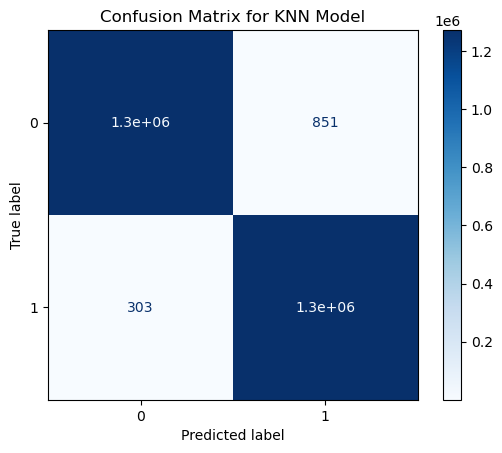

In [22]:
# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)  # Optional: Change the color scheme if needed
plt.title("Confusion Matrix for KNN Model")
plt.show()

In [23]:
from sklearn.metrics import precision_recall_curve, auc

In [24]:
# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Predict probabilities
y_scores = clf.predict_proba(X_test)[:, 1]
y_scores
# Generate precision-recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Calculate area under curve
pr_auc = auc(recall, precision)
pr_auc

0.9996075626872666

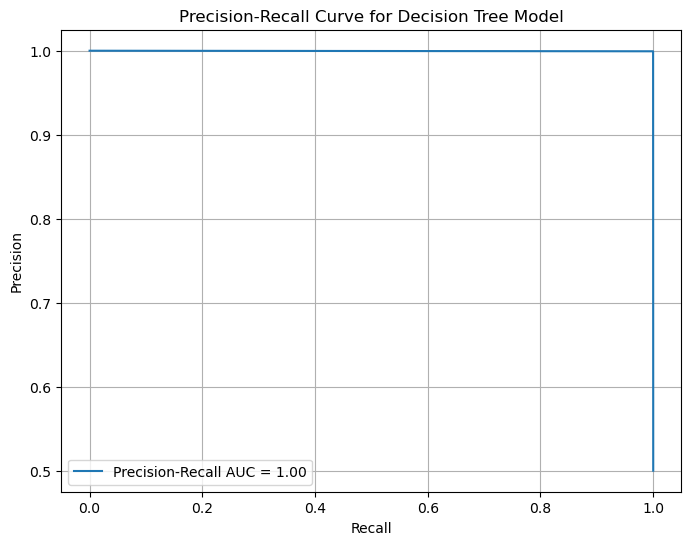

In [25]:
# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Decision Tree Model')
plt.legend(loc='lower left')
plt.grid()
plt.show()

test:

In [27]:
from sklearn.tree import DecisionTreeRegressor


In [28]:
tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [29]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [30]:
# Predict on the test set, not the training set
pred_test = tree.predict(X_test)

# Calculate evaluation metrics based on the test predictions
print(f"MAE: {mean_absolute_error(y_test, pred_test):.2f}")
print(f"RMSE: {mean_squared_error(y_test, pred_test, squared=False):.2f}")
print(f"R2 score: {tree.score(X_test, y_test):.2f}")

MAE: 0.02
RMSE: 0.10
R2 score: 0.96


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


adaboost

In [32]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor

In [33]:
bagging_reg = BaggingRegressor(DecisionTreeRegressor(max_depth=20),
                               n_estimators=100, # number of models to use
                               max_samples = 1000)
bagging_reg

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                 max_samples=1000, n_estimators=100)

In [34]:
bagging_reg.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                 max_samples=1000, n_estimators=100)

In [35]:
y_pred_test_bag = bagging_reg.predict(X_test)

print(f"Test Set MAE {mean_absolute_error(y_test, pred_test): .2f}")
print(f"Test Set RMSE {mean_squared_error(y_test, pred_test, squared=False): .2f}")
print(f"Test Set R2 score {bagging_reg.score(X_test, y_test): .2f}")

Test Set MAE  0.02
Test Set RMSE  0.10


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Test Set R2 score  0.94


In [36]:
# Predict on the training set
train_predictions = dt.predict(X_train)

mae_train = mean_absolute_error(y_train, train_predictions)
rmse_train = mean_squared_error(y_train, train_predictions, squared=False)  # RMSE
r2_train = r2_score(y_train, train_predictions)

print(f"Training Set MAE: {mae_train:.2f}")
print(f"Training Set RMSE: {rmse_train:.2f}")
print(f"Training Set R² score: {r2_train:.2f}")

Training Set MAE: 0.00
Training Set RMSE: 0.00
Training Set R² score: 1.00


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


- the model is perfectly fitting the training data with no error and perfect prediction.
- the model is very good on test set but not like train set.
- => model is overfitting

In [38]:
from sklearn.model_selection import cross_val_score

In [68]:
# Perform 5-fold cross-validation
cv_mae = cross_val_score(dt, X_res, y_res, cv=5, scoring='neg_mean_absolute_error')
print(f"Cross-Validation MAE: {-cv_mae.mean():.2f}")

Cross-Validation MAE: 0.23


- This is much higher than the test set MAE of 0.02
- error increased drastically

In [69]:
cv_rmse = cross_val_score(dt, X_res, y_res, cv=5, scoring='neg_root_mean_squared_error')
print(f"Cross-Validation RMSE: {-cv_rmse.mean():.2f}")

Cross-Validation RMSE: 0.42


- this is much higher than the test set RMSE of 0.10
- predictions are less accurate

In [70]:
cv_r2 = cross_val_score(dt, X_res, y_res, cv=5, scoring='r2')
print(f"Cross-Validation R² score: {cv_r2.mean():.2f}")

Cross-Validation R² score: 0.08


- big drop from the test set R² score of 0.94
- model is not generalizing well

---